# Multiple linear Regression

The general purpose of multiple regression is to learn more about the relationship between several independent or predictor variables and a dependent or criterion variable. 
 
 The Formula for Multiple Linear Regression Is

\begin{aligned} &y_i = \beta_0 + \beta _1 x_{i1} + \beta _2 x_{i2} + ... + \beta _p x_{ip} + \epsilon\\ &\textbf{where, for } i = n \textbf{ observations:}\\ &y_i=\text{dependent variable}\\ &x_i=\text{expanatory variables}\\ &\beta_0=\text{y-intercept (constant term)}\\ &\beta_p=\text{slope coefficients for each explanatory variable}\\ &\epsilon=\text{the model's error term (also known as the residuals)}\\ \end{aligned}  




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split #split to training and test sets
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics


In [27]:
salary_data =  pd.read_csv("salary.csv").dropna()

In [28]:
salary_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [29]:
#creating a fitted model with all variables
lm1 = smf.ols(formula='salary ~ exprior + yearsworked + yearsrank + market + degree + otherqual + position + male + Field + yearsabs', data = salary_data).fit()
lm1.params

Intercept       4061.006038
exprior          165.129681
yearsworked     -115.202071
yearsrank        787.061611
market         31589.626426
degree           213.856152
otherqual       2509.894578
position        7856.035165
male             507.047369
Field          -1978.648362
yearsabs         -21.847066
dtype: float64

In [30]:
#Creating X and y
variables_cols = ['exprior', 'yearsworked', 'yearsrank', 'market', 'degree', 'otherqual', 'position', 'male', 'Field', 'yearsabs']
X = salary_data[feature_cols]
y = salary_data.salary

#instantiate and fit
lm2 = LinearRegression()
lm2.fit(X,y)

#print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

4061.006037773426
[ 1.65129681e+02 -1.15202071e+02  7.87061611e+02  3.15896264e+04
  2.13856152e+02  2.50989458e+03  7.85603517e+03  5.07047369e+02
 -1.97864836e+03 -2.18470660e+01]


# Now we pair the feature names with their coefficients

In [31]:
list(zip(variables_cols, lm2.coef_))

[('exprior', 165.1296807453842),
 ('yearsworked', -115.202070997086),
 ('yearsrank', 787.0616105545433),
 ('market', 31589.626426497594),
 ('degree', 213.85615192053274),
 ('otherqual', 2509.8945779951305),
 ('position', 7856.035165247932),
 ('male', 507.0473690947591),
 ('Field', -1978.6483620806985),
 ('yearsabs', -21.847066019981156)]

# Interpreting coefficients

# Statsmodels summary

In [32]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 21 May 2019   Prob (F-statistic):          5.29e-173
Time:                        14:14:44   Log-Likelihood:                -5150.4
No. Observations:                 513   AIC:                         1.032e+04
Df Residuals:                     502   BIC:                         1.037e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4061.0060   2529.482      1.605      0.109    -908.670    9030.682
exprior       165.1297     72.632      2.274      0.023      22.430     307.829
yearsworked  -115.2021     85.699     -1.344      0.179    -283.575      53.171
yearsrank     787.0616     80.957      9.722      0.000     628.006     946.118
market       3.159e+04   1774.218     17.805      0.000    2.81e+04    3.51e+04
degree        213.8562   1402.297      0.153      0.879   -2541.238    2968.951
otherqual    2509.8946   1312.336      1.913      0.056     -68.453    5088.242
position     7856.0352    626.464     12.540      0.000    6625.221    9086.849
male          507.0474    856.991      0.592      0.554   -1176.684    2190.779
Field       -1978.6484    241.460     -8.195      0.000   -2453.046   -1504.251
yearsabs      -21.8471     21.009     -1.040      0.299     -63.123      19.429
==============================================================================
Omnibus:                       35.749   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.302
Skew:                           0.549   Prob(JB):                     1.97e-11
Kurtosis:                       4.050   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Points on what we get from the summary output

yearsworked,Field, and yearsabs are negatively associted with salary
R^2 equals 80%,this model provides a good fit for our data

# Plotting The Least Squares Line

/home/nomfundo/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


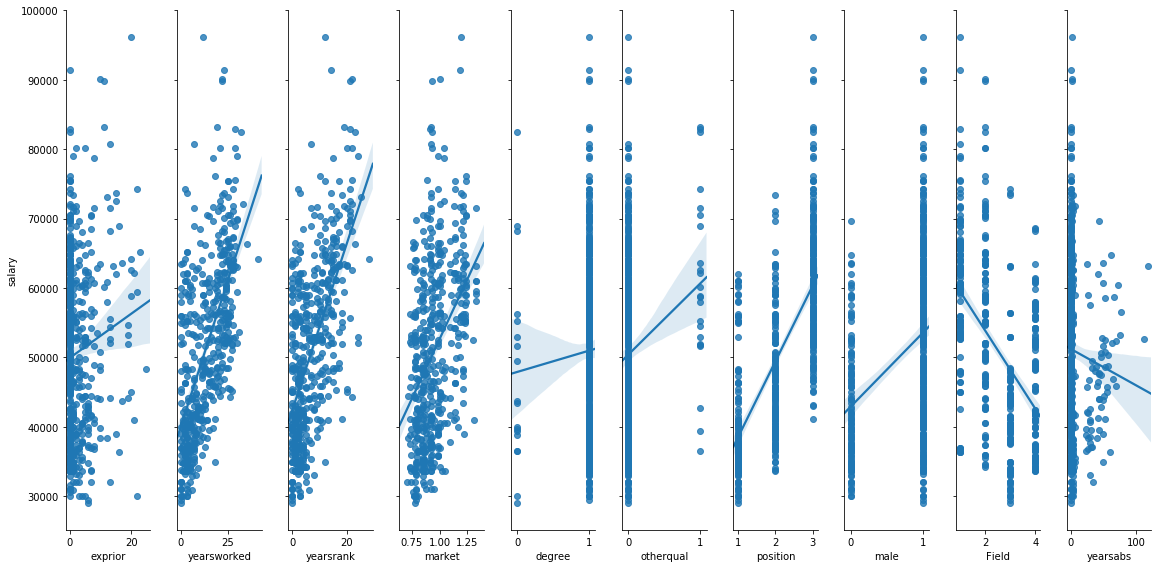

In [43]:
sns.pairplot(salary_data, x_vars=variables_cols, y_vars='salary', size=8, aspect=0.2, kind='reg')